# All Sectors

In [1]:
import os
os.chdir('../../scripts')
import pandas as pd
import matplotlib.pyplot as plt
from post_processing import get_output
from analysis_tools_cython import *
import seaborn as sns
plt.rcParams['figure.figsize'] = [12,7]

## Import Data

In [2]:
# data = get_output('../combined_dataframe.txt')
# data.head()

In [3]:
data = pd.read_csv('../combined_dataframe.txt')
with open("colnames.json", "r", encoding="utf-8") as f:
        check = f.read()
        columns = json.loads(check)
        columns = columns["column_names"]
data.columns = columns
data.head()
length = len(data)

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/home/astro/phrdhx/.local/lib/python3.7/site-packages/IPython/core/interactiveshell.py", line 3417, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-3-59ff56420882>", line 1, in <module>
    data = pd.read_csv('../combined_dataframe.txt')
  File "/home/astro/phrdhx/micromamba/envs/auto_exo/lib/python3.7/site-packages/pandas/util/_decorators.py", line 311, in wrapper
    return func(*args, **kwargs)
  File "/home/astro/phrdhx/micromamba/envs/auto_exo/lib/python3.7/site-packages/pandas/io/parsers/readers.py", line 586, in read_csv
    return _read(filepath_or_buffer, kwds)
  File "/home/astro/phrdhx/micromamba/envs/auto_exo/lib/python3.7/site-packages/pandas/io/parsers/readers.py", line 488, in _read
    return parser.read(nrows)
  File "/home/astro/phrdhx/micromamba/envs/auto_exo/lib/python3.7/site-packages/pandas/io/parsers/readers.py", line 1047, in read
    index, columns, col_dict = self._engine.read(

TypeError: object of type 'NoneType' has no len()

- Change path to storage

In [ ]:
data = data[data.transit_prob == 'maybeTransit']
data['abs_path'] = data['path'].str.replace('/tmp/tess/', '/storage/astro2/phrdhx/tesslcs/')
print(len(data), f"after maybeTransit, {len(data)/length *100}% candidates remain")
data.head()

## Removing worst anomalies

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=2)
ax[0].scatter(data.asym_score,abs(data.snr),s=5)
ax[0].set_xlabel("asymmetry")
ax[1].set_xlabel("skewness")
ax[0].set_ylabel("snr")
ax[1].scatter(data.skewness,abs(data.snr),s=5)
plt.show()

In [ ]:
# for i in data.loc[abs(data.skewness >= 10) & abs(data.skewness <= 20)].path.head(): #4 x 4 grid for illustration purposes
#     lc, lc_info = import_XRPlightcurve(i,sector=6)
#     lc = lc['time','corrected flux','quality','flux error']
#     _, _ = processing(lc,lc_info=lc_info,method='median',make_plots=True)

In [ ]:
data = data[(data.asym_score <= 3)].reset_index(drop=True)
data.head()

### Distribution of Asymmetry vs SNR, and Skewness vs SNR

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=2)
ax[0].scatter(data.asym_score,abs(data.snr),s=5)
ax[0].set_xlabel("asymmetry")
ax[1].set_xlabel("skewness")
ax[0].set_ylabel("snr")
ax[1].scatter(data.skewness,abs(data.snr),s=5)
plt.show()

---

### Some EDA

In [ ]:
data['time'].hist(bins=500,figsize=(20,10))

## SNR cut

In [ ]:
data_new = data[abs(data.snr) >= 5].reset_index(drop=True)
len(data_new)

## Duration cut

In [ ]:
data_new.drop(data_new[data_new['duration'] <= 0.4].index,inplace=True)

## Depth cut

In [ ]:
data_new['abs_depth'] = abs(data_new.depth)

In [ ]:
data_new.drop(data_new[(data_new['abs_depth'] >= 0.1)].index,inplace=True)

### Distribution of remaining candidates

In [ ]:
plt.scatter(data_new.asym_score,abs(data_new.depth),s=20,label='candidates')
plt.ylim([0,0.1])
plt.xlabel('asym_score')
plt.ylabel('depth')
plt.xticks(np.arange(0,3,0.25))
plt.legend()
plt.colorbar(label='Duration')
plt.show()

In [ ]:
os.getcwd()

In [ ]:
data_new.to_csv('../som_candidates.csv')

In [17]:
data_new

,path,TIC_ID,signal,snr,time,asym_score,amplitude,width,skewness,skewness_err,...,chisq_skew,rchisq_gauss,rchisq_skew,rmse_gauss,rmse_skew,mae_gauss,mae_skew,transit_prob,abs_path,abs_depth
17,/tmp/tess/tesslcs_sector_24_104/tesslcs_tmag_1...,468679961,-8.84305,-5.33273,1980.19522,0.99862,0.00107,0.42077,-0.00107,1.488473e+06,...,796.27704,6.87341,6.86446,0.00091,0.00091,0.00071,0.00071,maybeTransit,/storage/astro2/phrdhx/tesslcs/tesslcs_sector_...,0.00102
18,/tmp/tess/tesslcs_sector_24_104/tesslcs_tmag_1...,282786286,-9.37623,-5.08940,1974.75725,1.15762,0.00251,1.54721,30.00000,4.361315e+01,...,198.15961,1.28621,1.12591,0.00104,0.00097,0.00086,0.00079,maybeTransit,/storage/astro2/phrdhx/tesslcs/tesslcs_sector_...,0.00129
33,/tmp/tess/tesslcs_sector_24_104/tesslcs_tmag_1...,83345107,-25.02032,-7.13134,1974.23632,1.01467,0.00191,0.24656,-1.91870,7.586900e-01,...,394.86546,2.52001,2.49915,0.00074,0.00074,0.00060,0.00059,maybeTransit,/storage/astro2/phrdhx/tesslcs/tesslcs_sector_...,0.00453
81,/tmp/tess/tesslcs_sector_24_104/tesslcs_tmag_1...,403114300,-19.82019,-6.15933,1976.57206,1.12241,0.00259,0.38977,4.94725,1.570460e+00,...,672.84428,3.84185,3.46827,0.00092,0.00086,0.00067,0.00063,maybeTransit,/storage/astro2/phrdhx/tesslcs/tesslcs_sector_...,0.00479
94,/tmp/tess/tesslcs_sector_24_104/tesslcs_tmag_1...,236770704,-13.81028,-5.24094,1979.59371,1.00949,0.00083,0.22514,1.60597,7.206700e-01,...,146.96829,1.16017,1.14819,0.00030,0.00030,0.00023,0.00023,maybeTransit,/storage/astro2/phrdhx/tesslcs/tesslcs_sector_...,0.00204
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
352543,/tmp/tess/tesslcs_sector_15_104/tesslcs_tmag_1...,405682982,-7.57513,-5.01174,1721.59572,1.03921,0.00128,0.22800,30.00000,2.133052e+02,...,147.80936,1.10458,1.05578,0.00237,0.00232,0.00176,0.00172,maybeTransit,/storage/astro2/phrdhx/tesslcs/tesslcs_sector_...,0.00442
352544,/tmp/tess/tesslcs_sector_15_104/tesslcs_tmag_8...,232881015,-14.37544,-6.12895,1715.34811,1.00421,0.00110,0.23522,-1.55845,1.524520e+00,...,5874.04822,43.99823,43.83618,0.00084,0.00083,0.00059,0.00059,maybeTransit,/storage/astro2/phrdhx/tesslcs/tesslcs_sector_...,0.00257
352552,/tmp/tess/tesslcs_sector_15_104/tesslcs_tmag_8...,373204003,-13.75803,-5.19274,1715.38942,0.99987,0.00114,0.15402,0.00543,3.483317e+04,...,7837.96136,53.69153,53.68467,0.00101,0.00101,0.00077,0.00078,maybeTransit,/storage/astro2/phrdhx/tesslcs/tesslcs_sector_...,0.00295
352562,/tmp/tess/tesslcs_sector_15_104/tesslcs_tmag_6...,147686175,-12.95671,-6.19001,1715.44517,1.12185,0.00026,0.30507,-30.00000,7.066304e+01,...,1146.04947,10.89928,9.87974,0.00027,0.00026,0.00018,0.00016,maybeTransit,/storage/astro2/phrdhx/tesslcs/tesslcs_sector_...,0.00068


---

## Some further analysis

### Import EB catalogue

In [17]:
from astroquery.mast import Catalogs

catalog_data = Catalogs.query_criteria(catalog="Tic",objType="TOI")

In [18]:
catalog_data

ID,version,HIP,TYC,UCAC,TWOMASS,SDSS,ALLWISE,GAIA,APASS,KIC,objType,typeSrc,ra,dec,POSflag,pmRA,e_pmRA,pmDEC,e_pmDEC,PMflag,plx,e_plx,PARflag,gallong,gallat,eclong,eclat,Bmag,e_Bmag,Vmag,e_Vmag,umag,e_umag,gmag,e_gmag,rmag,e_rmag,imag,e_imag,zmag,e_zmag,Jmag,e_Jmag,Hmag,e_Hmag,Kmag,e_Kmag,TWOMflag,prox,w1mag,e_w1mag,w2mag,e_w2mag,w3mag,e_w3mag,w4mag,e_w4mag,GAIAmag,e_GAIAmag,Tmag,e_Tmag,TESSflag,SPFlag,Teff,e_Teff,logg,e_logg,MH,e_MH,rad,e_rad,mass,e_mass,rho,e_rho,lumclass,lum,e_lum,d,e_d,ebv,e_ebv,numcont,contratio,disposition,duplicate_id,priority,eneg_EBV,epos_EBV,EBVflag,eneg_Mass,epos_Mass,eneg_Rad,epos_Rad,eneg_rho,epos_rho,eneg_logg,epos_logg,eneg_lum,epos_lum,eneg_dist,epos_dist,distflag,eneg_Teff,epos_Teff,TeffFlag,gaiabp,e_gaiabp,gaiarp,e_gaiarp,gaiaqflag,starchareFlag,VmagFlag,BmagFlag,splists,e_RA,e_Dec,RA_orig,Dec_orig,e_RA_orig,e_Dec_orig,raddflag,wdflag,objID
str1,str1,int64,str1,str1,str1,str1,str1,str1,str1,int64,str1,str1,float64,float64,str1,float64,float64,float64,float64,str1,float64,float64,str1,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,str1,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,str1,str1,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,str1,float64,float64,float64,float64,float64,float64,int64,float64,str1,str1,float64,float64,float64,str1,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,str1,float64,float64,str1,float64,float64,float64,float64,int64,str1,str1,str1,str1,float64,float64,float64,float64,float64,float64,int64,int64,str1


In [20]:
ebs = pd.read_csv('../eb_cat.txt')
tois = pd.read_csv('../exofop_tess_tois.csv')

tois = tois.reset_index()
tois = tois['level_0'][1:]
tois = tois.values.astype(int)



In [21]:
data_new

,path,TIC_ID,signal,snr,time,asym_score,amplitude,width,skewness,skewness_err,...,chisq_skew,rchisq_gauss,rchisq_skew,rmse_gauss,rmse_skew,mae_gauss,mae_skew,transit_prob,abs_path,abs_depth
17,/tmp/tess/tesslcs_sector_24_104/tesslcs_tmag_1...,468679961,-8.84305,-5.33273,1980.19522,0.99862,0.00107,0.42077,-0.00107,1.488473e+06,...,796.27704,6.87341,6.86446,0.00091,0.00091,0.00071,0.00071,maybeTransit,/storage/astro2/phrdhx/tesslcs/tesslcs_sector_...,0.00102
18,/tmp/tess/tesslcs_sector_24_104/tesslcs_tmag_1...,282786286,-9.37623,-5.08940,1974.75725,1.15762,0.00251,1.54721,30.00000,4.361315e+01,...,198.15961,1.28621,1.12591,0.00104,0.00097,0.00086,0.00079,maybeTransit,/storage/astro2/phrdhx/tesslcs/tesslcs_sector_...,0.00129
33,/tmp/tess/tesslcs_sector_24_104/tesslcs_tmag_1...,83345107,-25.02032,-7.13134,1974.23632,1.01467,0.00191,0.24656,-1.91870,7.586900e-01,...,394.86546,2.52001,2.49915,0.00074,0.00074,0.00060,0.00059,maybeTransit,/storage/astro2/phrdhx/tesslcs/tesslcs_sector_...,0.00453
81,/tmp/tess/tesslcs_sector_24_104/tesslcs_tmag_1...,403114300,-19.82019,-6.15933,1976.57206,1.12241,0.00259,0.38977,4.94725,1.570460e+00,...,672.84428,3.84185,3.46827,0.00092,0.00086,0.00067,0.00063,maybeTransit,/storage/astro2/phrdhx/tesslcs/tesslcs_sector_...,0.00479
94,/tmp/tess/tesslcs_sector_24_104/tesslcs_tmag_1...,236770704,-13.81028,-5.24094,1979.59371,1.00949,0.00083,0.22514,1.60597,7.206700e-01,...,146.96829,1.16017,1.14819,0.00030,0.00030,0.00023,0.00023,maybeTransit,/storage/astro2/phrdhx/tesslcs/tesslcs_sector_...,0.00204
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
352543,/tmp/tess/tesslcs_sector_15_104/tesslcs_tmag_1...,405682982,-7.57513,-5.01174,1721.59572,1.03921,0.00128,0.22800,30.00000,2.133052e+02,...,147.80936,1.10458,1.05578,0.00237,0.00232,0.00176,0.00172,maybeTransit,/storage/astro2/phrdhx/tesslcs/tesslcs_sector_...,0.00442
352544,/tmp/tess/tesslcs_sector_15_104/tesslcs_tmag_8...,232881015,-14.37544,-6.12895,1715.34811,1.00421,0.00110,0.23522,-1.55845,1.524520e+00,...,5874.04822,43.99823,43.83618,0.00084,0.00083,0.00059,0.00059,maybeTransit,/storage/astro2/phrdhx/tesslcs/tesslcs_sector_...,0.00257
352552,/tmp/tess/tesslcs_sector_15_104/tesslcs_tmag_8...,373204003,-13.75803,-5.19274,1715.38942,0.99987,0.00114,0.15402,0.00543,3.483317e+04,...,7837.96136,53.69153,53.68467,0.00101,0.00101,0.00077,0.00078,maybeTransit,/storage/astro2/phrdhx/tesslcs/tesslcs_sector_...,0.00295
352562,/tmp/tess/tesslcs_sector_15_104/tesslcs_tmag_6...,147686175,-12.95671,-6.19001,1715.44517,1.12185,0.00026,0.30507,-30.00000,7.066304e+01,...,1146.04947,10.89928,9.87974,0.00027,0.00026,0.00018,0.00016,maybeTransit,/storage/astro2/phrdhx/tesslcs/tesslcs_sector_...,0.00068


In [22]:
ebs_found = data_new[data_new['TIC_ID'].isin(ebs['ID'])]
tois_found =  data_new[data_new['TIC_ID'].isin(tois)]

In [23]:
# Step 1: Create a boolean mask
data_new['is_eb'] = data_new['TIC_ID'].isin(ebs['ID'])
data_new['is_toi'] = data_new['TIC_ID'].isin(tois)

In [24]:
log_peak_power = np.log10(data_new['peak_lspower'])
log_depth = np.log10(abs(data_new['depth']))

In [25]:
len(data_new)

59362

### Duration vs depth

In [26]:
frac_dur = data_new.duration[(data_new.is_eb == False) & (data_new.is_toi == False)]
frac_depth = data_new.depth[(data_new.is_eb == False) & (data_new.is_toi == False)]

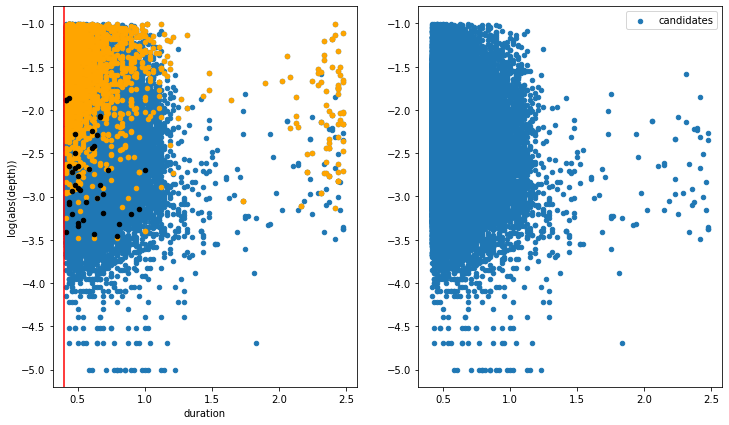

In [27]:
fig, ax = plt.subplots(ncols=2)

ax[0].scatter(data_new.duration,log_depth,s=20,label='candidates',zorder=1)
ax[0].scatter(ebs_found.duration,np.log10(abs(ebs_found['depth'])),c='orange',s=20,label='ebs')
ax[0].scatter(tois_found.duration,np.log10(abs(tois_found['depth'])),c='black',s=20,label='tois')

ax[1].scatter(frac_dur,np.log10(abs(frac_depth)),s=20,label='candidates',zorder=1)
#ax[1].scatter(tois_found.duration,np.log10(abs(tois_found['depth'])),c='black',s=20,label='tois')



ax[0].set_xlabel('duration')
ax[0].set_ylabel('log(abs(depth))')
ax[0].axvline(0.4,c='red')

plt.legend()

### Duration vs Peak_lspower

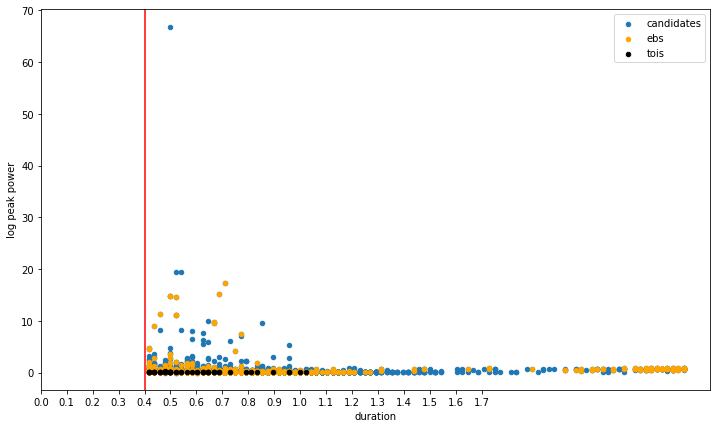

In [28]:
plt.scatter(data_new.duration,data_new.peak_lspower,s=20,label='candidates')
plt.scatter(ebs_found.duration,ebs_found.peak_lspower,c='orange',s=20,label='ebs')
plt.scatter(tois_found.duration,tois_found.peak_lspower,c='black',s=20,label='tois')

plt.xticks(np.arange(0,1.75,0.1))
plt.xlabel('duration')
plt.ylabel('log peak power')
plt.axvline(0.4,c='red')
plt.legend()

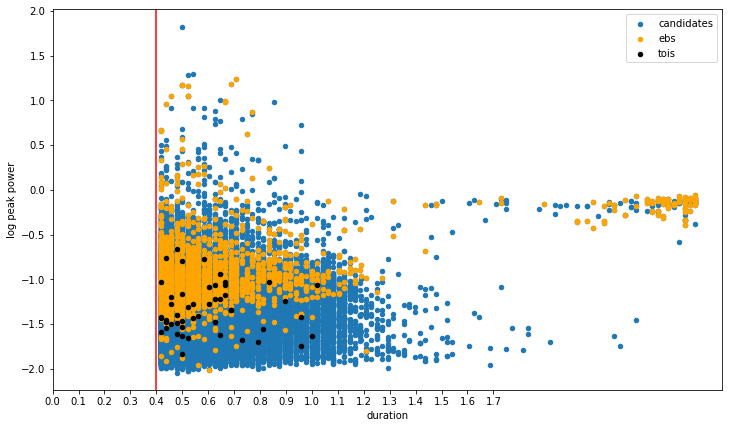

In [30]:
plt.scatter(data_new.duration,log_peak_power,s=20,label='candidates')
plt.scatter(ebs_found.duration,np.log10(ebs_found['peak_lspower']),c='orange',s=20,label='ebs')
plt.scatter(tois_found.duration,np.log10(tois_found['peak_lspower']),c='black',s=20,label='tois')

plt.xticks(np.arange(0,1.75,0.1))
plt.xlabel('duration')
plt.ylabel('log peak power')
plt.axvline(0.4,c='red')
plt.legend()

In [28]:
crossref_tot = (ebs_found.duration) + (tois_found.duration) / data_new.duration
crosref_ebs = (ebs_found.duration) / data_new.duration
cross_ref_toi = (tois_found.duration) / data_new.duration

### duration vs SNR

Text(0, 0.5, 'snr')

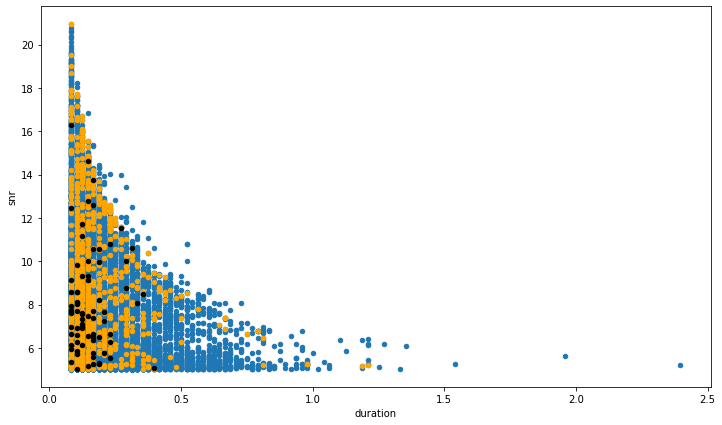

In [29]:
plt.scatter(data_new.duration,abs(data_new.snr),s=20,label='candidates')
plt.scatter(ebs_found.duration,abs(ebs_found.snr),c='orange',s=20,label='ebs')
plt.scatter(tois_found.duration,abs(tois_found.snr),c='black',s=20,label='tois')
plt.xlabel('duration')
plt.ylabel('snr')

### asymmetry vs depth

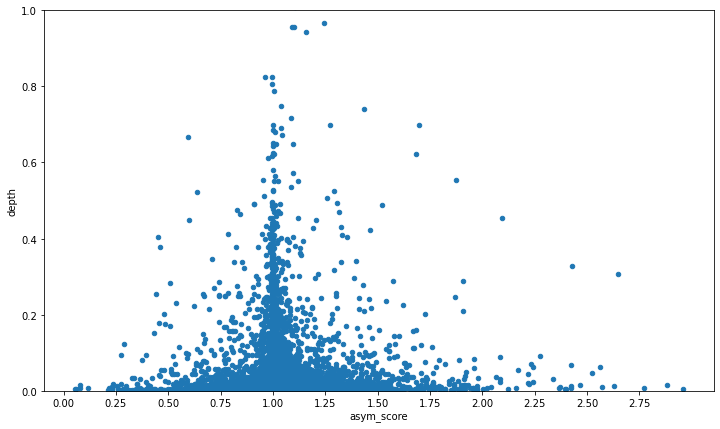

In [30]:
plt.scatter(data_new.asym_score,abs(data_new.depth),s=20,label='candidates')
plt.ylim([0,1])
plt.xlabel('asym_score')
plt.ylabel('depth')
plt.xticks(np.arange(0,3,0.25))
plt.show()

In [31]:
test = data_new[(data_new.asym_score >=0.75) & (data_new.asym_score <= 0.85)]

#### Explore spike at ~0.8

In [32]:
for i in data_new[(data_new.asym_score >=0.75) & (data_new.asym_score <= 0.85)].path.head(2): #4 x 4 grid for illustration purposes
    lc, lc_info = import_XRPlightcurve(i,sector=6)
    plt.figure(figsize=(12,5))
    plt.scatter(lc['time'],normalise_flux(lc['corrected flux']), s=5)
    plt.title(f' TIC {lc_info[0]}')
    plt.show()

FileNotFoundError: [Errno 2] No such file or directory: '/tmp/tess/tesslcs_sector_1_104/tesslcs_tmag_11_12/tesslc_144045982.pkl'

### Spike at `asym_score ~ 1`

Expected. But nevertheless, let's see

759


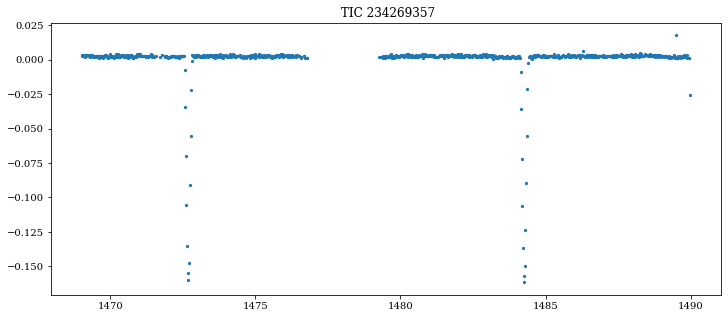

759


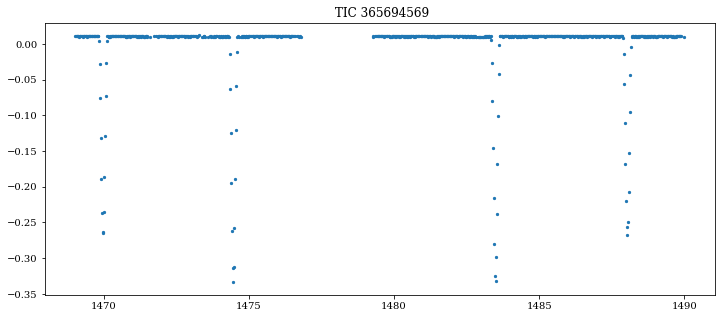

In [32]:
for i in data_new[(data_new.asym_score >=0.9) & (data_new.asym_score <= 1) & (abs(data_new.depth) >= 0.1)].path.head(2): #4 x 4 grid for illustration purposes
    print(len(data_new[(data_new.asym_score >=0.9) & (data_new.asym_score <= 1) & (abs(data_new.depth) >= 0.1)]))
    lc, lc_info = import_XRPlightcurve(i,sector=6)
    plt.figure(figsize=(12,5))
    plt.scatter(lc['time'],normalise_flux(lc['corrected flux']), s=5)
    plt.title(f' TIC {lc_info[0]}')
    plt.show()

### Make cut on 0.4 day duration

In [33]:
data_new.drop(data_new[data_new['duration'] <= 0.4].index,inplace=True)

In [34]:
data_new.head()

,path,TIC_ID,signal,snr,time,asym_score,amplitude,width,skewness,skewness_err,...,chisq_skew,rchisq_gauss,rchisq_skew,rmse_gauss,rmse_skew,mae_gauss,mae_skew,transit_prob,is_eb,is_toi
9,/tmp/tess/tesslcs_sector_1_104/tesslcs_tmag_10...,159736204,-8.98760,-6.00222,1342.64120,0.99991,0.00029,0.13958,-0.47192,5.79456,...,130.47084,0.97380,0.97366,0.00029,0.00029,0.00023,0.00023,maybeTransit,False,False
20,/tmp/tess/tesslcs_sector_1_104/tesslcs_tmag_10...,38574928,-8.32932,-5.35867,1346.74108,1.02276,0.00027,0.43270,29.99898,65.23645,...,171.79706,1.04277,1.01057,0.00032,0.00031,0.00021,0.00021,maybeTransit,False,False
57,/tmp/tess/tesslcs_sector_1_104/tesslcs_tmag_10...,425904899,-9.00914,-5.00717,1338.11883,1.02037,0.00041,0.28145,-4.90106,4.33500,...,281.57115,1.92822,1.85244,0.00046,0.00046,0.00030,0.00031,maybeTransit,False,False
77,/tmp/tess/tesslcs_sector_1_104/tesslcs_tmag_11...,177164215,-12.38486,-5.86620,1337.32340,1.21678,0.00112,0.41067,29.99957,36.75048,...,232.83216,1.48351,1.20017,0.00079,0.00072,0.00055,0.00051,maybeTransit,False,False
93,/tmp/tess/tesslcs_sector_1_104/tesslcs_tmag_10...,159833832,-29.99829,-7.95282,1342.72461,1.24623,0.00432,0.29287,-4.55648,1.18453,...,1729.43920,14.50092,10.94582,0.00155,0.00139,0.00088,0.00090,maybeTransit,False,False


### asym_score vs depth
depth spike at 0.3 days gone. 
- Most if not all the failed lightcurves should have been cut now.

In [35]:
from matplotlib.colors import ListedColormap

In [36]:
bin_colors = ['#1f78b4', '#33a02c', '#e31a1c', '#ff7f00', '#6a3d9a', '#b15928', '#a6cee3', '#b2df8a']

# Create a ListedColormap using the specific colors
custom_cmap = ListedColormap(bin_colors)

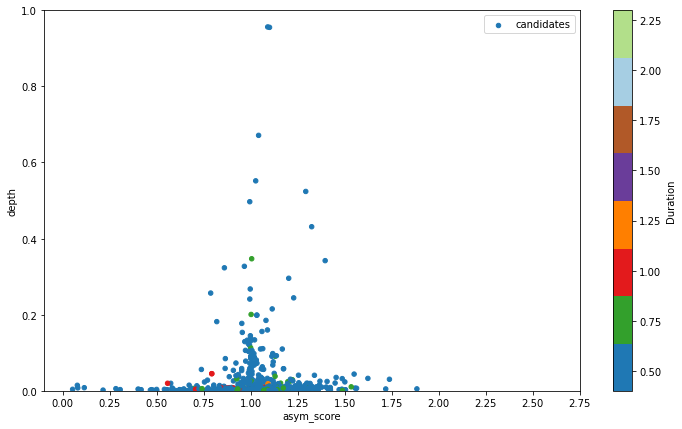

In [37]:
bin_interval = 0.1
bins = np.arange(0, np.max(data_new.duration) + bin_interval, bin_interval)

# Use np.digitize to map duration values to their corresponding bins
duration_binned = bins[np.digitize(data_new.duration, bins) - 1]


plt.scatter(data_new.asym_score,abs(data_new.depth),c=duration_binned,s=20,label='candidates',cmap=custom_cmap)
plt.ylim([0,1])
plt.xlim([-0.1,2])
plt.xlabel('asym_score')
plt.ylabel('depth')
plt.xticks(np.arange(0,3,0.25))
plt.legend()
plt.colorbar(label='Duration')
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f1c0c050490>]],
      dtype=object)

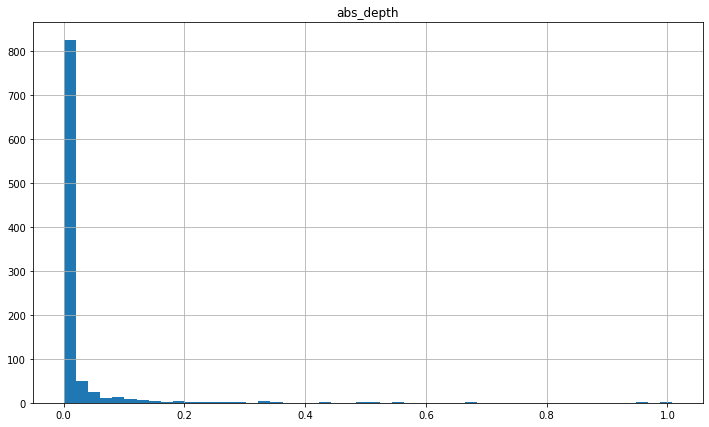

In [38]:
data_new['abs_depth'] = abs(data_new.depth)
data_new.hist('abs_depth',bins=50)

Most are low amplitude transits

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f1c0bda4410>]],
      dtype=object)

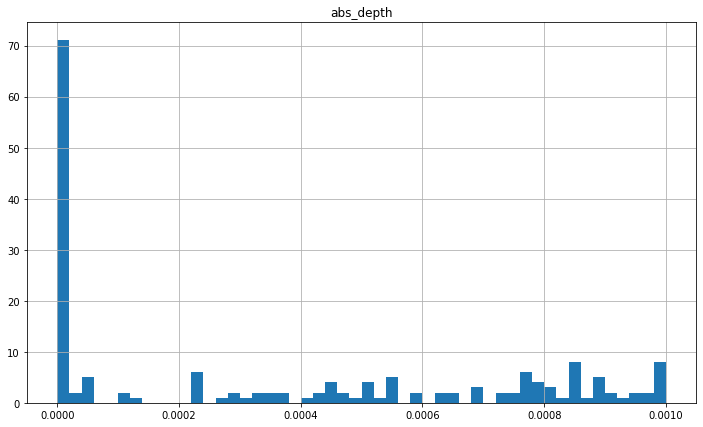

In [39]:
data_new[data_new.abs_depth <= 0.001].hist('abs_depth',bins=50)

In [40]:
data_new[data_new.abs_depth <= 0.001]

,path,TIC_ID,signal,snr,time,asym_score,amplitude,width,skewness,skewness_err,...,rchisq_gauss,rchisq_skew,rmse_gauss,rmse_skew,mae_gauss,mae_skew,transit_prob,is_eb,is_toi,abs_depth
9,/tmp/tess/tesslcs_sector_1_104/tesslcs_tmag_10...,159736204,-8.98760,-6.00222,1342.64120,0.99991,0.00029,0.13958,-0.47192,5.794560e+00,...,0.97380,0.97366,0.00029,0.00029,0.00023,0.00023,maybeTransit,False,False,0.00088
20,/tmp/tess/tesslcs_sector_1_104/tesslcs_tmag_10...,38574928,-8.32932,-5.35867,1346.74108,1.02276,0.00027,0.43270,29.99898,6.523645e+01,...,1.04277,1.01057,0.00032,0.00031,0.00021,0.00021,maybeTransit,False,False,0.00049
218,/tmp/tess/tesslcs_sector_1_104/tesslcs_tmag_10...,317089102,-9.97022,-5.86897,1346.11760,1.20102,0.00088,0.83271,-30.00000,4.248226e+01,...,3.14990,2.61469,0.00054,0.00050,0.00040,0.00035,maybeTransit,False,False,0.00084
256,/tmp/tess/tesslcs_sector_1_104/tesslcs_tmag_10...,294152177,-9.51430,-5.11856,1332.69752,0.96136,0.00071,0.28720,-0.00273,1.244992e+05,...,0.91539,0.88848,0.00040,0.00041,0.00031,0.00032,maybeTransit,False,False,0.00099
280,/tmp/tess/tesslcs_sector_1_104/tesslcs_tmag_11...,260043508,-10.51548,-5.21305,1345.11467,0.85747,0.00000,11.93760,29.99743,1.361002e+06,...,1.46266,1.70563,0.00112,0.00121,0.00090,0.00097,maybeTransit,False,False,0.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11026,/tmp/tess/tesslcs_sector_1_104/tesslcs_tmag_9_...,350953880,-8.86580,-5.03372,1333.96853,1.13283,0.00043,0.47377,29.99985,4.159655e+01,...,3.64113,3.19717,0.00036,0.00033,0.00029,0.00027,maybeTransit,False,False,0.00072
11119,/tmp/tess/tesslcs_sector_1_104/tesslcs_tmag_12...,358336550,-6.43213,-5.06215,1345.19855,0.88899,0.00039,0.50446,26.83769,1.335819e+02,...,0.79865,0.89365,0.00098,0.00104,0.00073,0.00078,maybeTransit,False,False,0.00062
11183,/tmp/tess/tesslcs_sector_1_104/tesslcs_tmag_9_...,289917327,-9.85713,-5.20404,1344.18333,0.85410,0.00002,0.40470,-22.85381,2.720668e+08,...,871.10573,1076.05463,0.00452,0.00489,0.00325,0.00352,maybeTransit,False,False,0.00003
11228,/tmp/tess/tesslcs_sector_1_104/tesslcs_tmag_9_...,372851851,-13.54777,-5.07533,1345.71892,1.48716,0.00139,1.39862,-25.91914,1.593364e+01,...,2.42768,1.60486,0.00033,0.00027,0.00026,0.00021,maybeTransit,False,False,0.00079


In [41]:
for i in data_new[data_new.asym_score <= 0.01].path.head(10): #4 x 4 grid for illustration purposes
    lc, lc_info = import_XRPlightcurve(i,sector=6)
    lc = lc['time','corrected flux','quality','flux error']
    results, _ = processing(lc,lc_info=lc_info,method='median',make_plots=True)
    #plt.figure(figsize=(12,5))
    #plt.scatter(lc['time'],normalise_flux(lc['corrected flux']), s=5)
    #plt.title(f' TIC {lc_info[0]}')
    #plt.show()

### Make cut at `> 0.1` and `< 0` depth

In [42]:
data_new.drop(data_new[(data_new['abs_depth'] >= 0.1)].index,inplace=True)

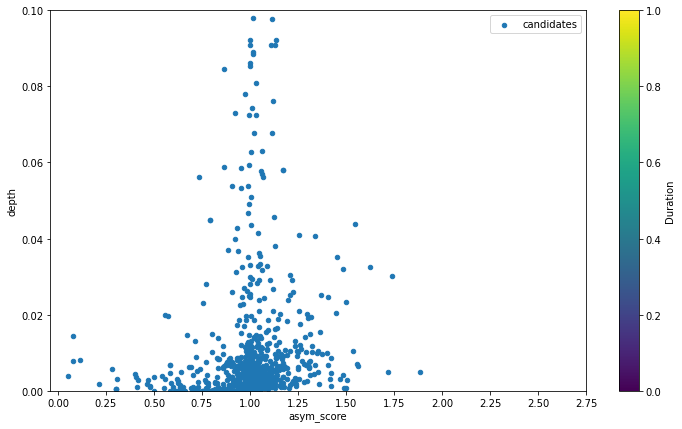

In [43]:
plt.scatter(data_new.asym_score,abs(data_new.depth),s=20,label='candidates',cmap=custom_cmap)
plt.ylim([0,0.1])
plt.xlabel('asym_score')
plt.ylabel('depth')
plt.xticks(np.arange(0,3,0.25))
plt.legend()
plt.colorbar(label='Duration')
plt.show()

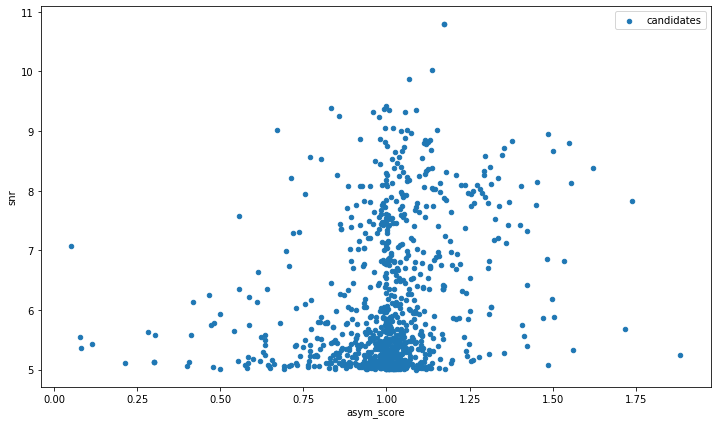

In [44]:
plt.scatter(data_new.asym_score,abs(data_new.snr),s=20,label='candidates',cmap=custom_cmap)
plt.xlabel('asym_score')
plt.ylabel('snr')
plt.legend()
plt.show()

- 0.1 == 10% depth
- 0.01 == 1% depth
- 0.001 == 0.1% depth

### SNR vs depth

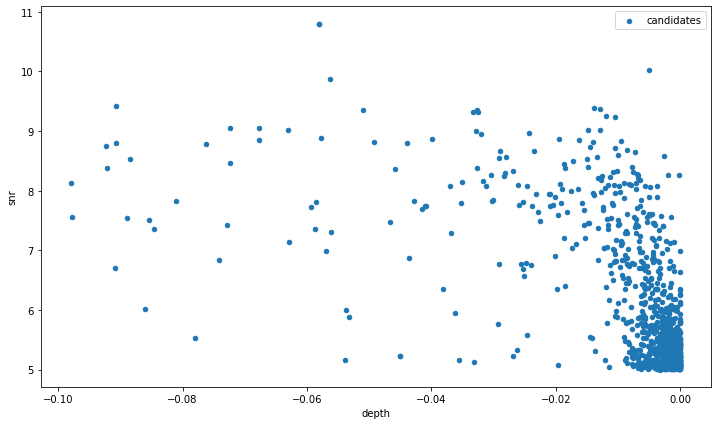

In [45]:
plt.scatter(data_new.depth,abs(data_new.snr),s=20,label='candidates',cmap=custom_cmap)
plt.xlabel('depth')
plt.ylabel('snr')
plt.legend()
plt.show()

## Make SOM Cutouts

In [46]:
os.getcwd()

'/home/astro/phrdhx/automated_exocomet_hunt/scripts'

In [47]:
os.chdir('../')
for i in data_new.path:
    lc, lc_info = import_XRPlightcurve(i,sector=6)
    lc = lc['time','corrected flux','quality','flux error']
    results, _ = processing(lc,lc_info=lc_info,method='median',som_cutouts=True)
    #plt.scatter(data['TIME'],data['PDCSAP_FLUX'],s=2)